In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re

mpl.rcParams['axes.unicode_minus'] = False

In [2]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.3.4
설치 위치:  C:\Users\HSS\anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\HSS\.matplotlib
캐시 위치:  C:\Users\HSS\.matplotlib


In [3]:
print ('mpl.get_configdir()): ', mpl.matplotlib_fname())

mpl.get_configdir()):  C:\Users\HSS\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [4]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

In [5]:
print(len(font_list)) 

528


In [6]:
font_list[:10] 

['C:\\Windows\\Fonts\\calibrili.ttf',
 'C:\\WINDOWS\\Fonts\\NanumFontSetup_TTF_ALL\\NanumSquareRoundB.ttf',
 'C:\\WINDOWS\\Fonts\\mmrtextb.ttf',
 'C:\\Windows\\Fonts\\YuGothB.ttc',
 'C:\\Windows\\Fonts\\calibrib.ttf',
 'C:\\WINDOWS\\Fonts\\HANBatangExtBB.ttf',
 'C:\\Windows\\Fonts\\couri.ttf',
 'C:\\WINDOWS\\Fonts\\NanumGothicExtraBold.ttf',
 'C:\\Windows\\Fonts\\HMFMMUEX.TTC',
 'C:\\WINDOWS\\Fonts\\pala.ttf']

In [7]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'NanumSquare' in f.name]

[('NanumSquareRound',
  'C:\\Windows\\Fonts\\NanumFontSetup_TTF_ALL\\NanumSquareRoundR.ttf'),
 ('NanumSquare_ac',
  'C:\\Windows\\Fonts\\NanumFontSetup_TTF_ALL\\NanumSquare_acB.ttf'),
 ('NanumSquare_ac',
  'C:\\Windows\\Fonts\\NanumFontSetup_TTF_ALL\\NanumSquare_acL.ttf'),
 ('NanumSquareRound',
  'C:\\Windows\\Fonts\\NanumFontSetup_TTF_ALL\\NanumSquareRoundB.ttf'),
 ('NanumSquare',
  'C:\\Windows\\Fonts\\NanumFontSetup_TTF_ALL\\NanumSquareEB.ttf'),
 ('NanumSquare',
  'C:\\Windows\\Fonts\\NanumFontSetup_TTF_ALL\\NanumSquareB.ttf'),
 ('NanumSquare_ac',
  'C:\\Windows\\Fonts\\NanumFontSetup_TTF_ALL\\NanumSquare_acEB.ttf'),
 ('NanumSquareRound',
  'C:\\Windows\\Fonts\\NanumFontSetup_TTF_ALL\\NanumSquareRoundL.ttf'),
 ('NanumSquare_ac',
  'C:\\Windows\\Fonts\\NanumFontSetup_TTF_ALL\\NanumSquare_acR.ttf'),
 ('NanumSquareRound',
  'C:\\Windows\\Fonts\\NanumFontSetup_TTF_ALL\\NanumSquareRoundEB.ttf'),
 ('NanumSquare',
  'C:\\Windows\\Fonts\\NanumFontSetup_TTF_ALL\\NanumSquareL.ttf'),
 ('NanumS

In [32]:
fm = mp.font_manager.FontManager()
plt.rcParams["font.family"] = 'Malgun Gothic'

# 여기서 부터 시작

# 1. 내가 사용하고 싶은 한글 폰트 사용 법

# http://corazzon.github.io/matplotlib_font_setting

In [9]:
df_accomplice = pd.read_csv('./소년범죄자 공범관계.csv')
df_accomplice.head()

,No,자료시점,분류,분류.1,분류.2,계,계.1,계.2,계.3,계.4,계.5,계.6,계.7,계.8,계.9,계.10,계.11,계.12
0,No,자료시점,분류,분류,분류,계,단독범,공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),미상
1,No,자료시점,분류,분류,분류,계,단독범,공범(소계),학교동창,교도소·소년원친구,직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
2,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2018년,계,계[입력치],계[입력치],"66,142","31,713","27,554","9,543",195,63,234,2,"12,711",551,471,"3,784","6,875"
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"54,205","22,845","25,818","9,100",188,46,224,2,"11,963",535,430,"3,330","5,542"


In [10]:
df_accomplice.columns # 현재 데이터에 column명을 확인 가능

Index(['No', '자료시점', '분류', '분류.1', '분류.2', '계', '계.1', '계.2', '계.3', '계.4',
       '계.5', '계.6', '계.7', '계.8', '계.9', '계.10', '계.11', '계.12'],
      dtype='object')

In [11]:
df_accomplice = df_accomplice.rename(columns={'분류':'대분류', '분류.1':'중분류','분류.2':'소분류','계':'총합계',
                                              '계.1':'단독범','계.2':'공범 소계', '계.3':'학교동창', '계.4':'교도소,소년원친구',
                                              '계.5':'직장동료','계.6':'친인척','계.7':'군동료','계.8':'동네친구',
                                              '계.9':'고향친구','계.10':'애인','계.11':'기타','계.12':'미상'})
df_accomplice.head()

,No,자료시점,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
0,No,자료시점,분류,분류,분류,계,단독범,공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),공범(소계),미상
1,No,자료시점,분류,분류,분류,계,단독범,공범(소계),학교동창,교도소·소년원친구,직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
2,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2018년,계,계[입력치],계[입력치],"66,142","31,713","27,554","9,543",195,63,234,2,"12,711",551,471,"3,784","6,875"
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"54,205","22,845","25,818","9,100",188,46,224,2,"11,963",535,430,"3,330","5,542"


In [12]:
df_acc2 = df_accomplice.drop(index = [0,1,2])    # 행 삭제
df_acc2.head()

,No,자료시점,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
3,1,2018년,계,계[입력치],계[입력치],"66,142","31,713","27,554","9,543",195,63,234,2,"12,711",551,471,"3,784","6,875"
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"54,205","22,845","25,818","9,100",188,46,224,2,"11,963",535,430,"3,330","5,542"
5,3,2018년,형법범,재산범죄,재산범죄의 계[입력치],"26,497","9,988","14,970","4,898",170,17,100,1,"7,217",311,307,"1,949","1,539"
6,4,2018년,형법범,재산범죄,배임,2,0,1,0,0,0,0,0,0,0,0,1,1
7,5,2018년,형법범,재산범죄,사기,"6,968","3,737","2,304",427,40,5,10,1,"1,084",61,79,597,927


In [13]:
df_acc2.reset_index(drop=True,inplace=True)        # drop은 인덱스 세팅에 사용한 열을 삭제할지 여부
df_acc2.head()                                      # inplace는 원본 데이터를 변경할 것인지 복사만 할 것인지 여부

,No,자료시점,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
0,1,2018년,계,계[입력치],계[입력치],"66,142","31,713","27,554","9,543",195,63,234,2,"12,711",551,471,"3,784","6,875"
1,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"54,205","22,845","25,818","9,100",188,46,224,2,"11,963",535,430,"3,330","5,542"
2,3,2018년,형법범,재산범죄,재산범죄의 계[입력치],"26,497","9,988","14,970","4,898",170,17,100,1,"7,217",311,307,"1,949","1,539"
3,4,2018년,형법범,재산범죄,배임,2,0,1,0,0,0,0,0,0,0,0,1,1
4,5,2018년,형법범,재산범죄,사기,"6,968","3,737","2,304",427,40,5,10,1,"1,084",61,79,597,927


In [14]:
df_acc3 = df_acc2.drop(['No'], axis='columns')           # NO 열 삭제
df_acc3.head()

,자료시점,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
0,2018년,계,계[입력치],계[입력치],"66,142","31,713","27,554","9,543",195,63,234,2,"12,711",551,471,"3,784","6,875"
1,2018년,형법범,형법범계[입력치],형법범계[입력치],"54,205","22,845","25,818","9,100",188,46,224,2,"11,963",535,430,"3,330","5,542"
2,2018년,형법범,재산범죄,재산범죄의 계[입력치],"26,497","9,988","14,970","4,898",170,17,100,1,"7,217",311,307,"1,949","1,539"
3,2018년,형법범,재산범죄,배임,2,0,1,0,0,0,0,0,0,0,0,1,1
4,2018년,형법범,재산범죄,사기,"6,968","3,737","2,304",427,40,5,10,1,"1,084",61,79,597,927


## 여기까지 실행

## 질문1) '[입력치]' 가 들어있는 모든 행을 찾고 싶다.

## max_row를 통해 전체를 열어 눈으로 보고 찾았으나 만약 row 120개가 아니라 120,000개라면?

In [15]:
pd.set_option('display.max_row', 200)
pd.set_option('display.max_columns',100)

In [16]:
df_acc3["중분류"].str.contains("치]", case=False, na=True)      # case = False 는 대소문자 구분 없이 찾는다 na= nan도 표기해준다

0       True
1       True
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58      True
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

## 질문 2) 앞에 글자는 나두고 '[입력치]'란 글자만 삭제하고 싶다.

그럼 True인 것만 수정한다. 여기서는 2개이지만
만약에 전체적으로 드문드문 행~ 5,15,29,33,58,68,72,88,113 행에 하나씩 있다면?
한번에 '[입력치]'란 글자만 어떻게 바꾸나?

## 여기서 왜 '[입력' 이 남아 있나?

왜 한번에 지워지지 않나? 다른 쉬운 방법이 있나?
str을 사용하면 문자가 각각 하나씩으로 나눠진다고 들었는데 이렇게 사용해도 데이터에 문제가 없나?

In [17]:
df_acc3['자료시점'] = df_acc3['자료시점'].str.replace(pat="년",repl='',regex=True)
df_acc3

,자료시점,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
0,2018,계,계[입력치],계[입력치],"66,142","31,713","27,554","9,543",195,63,234,2,"12,711",551,471,"3,784","6,875"
1,2018,형법범,형법범계[입력치],형법범계[입력치],"54,205","22,845","25,818","9,100",188,46,224,2,"11,963",535,430,"3,330","5,542"
2,2018,형법범,재산범죄,재산범죄의 계[입력치],"26,497","9,988","14,970","4,898",170,17,100,1,"7,217",311,307,"1,949","1,539"
3,2018,형법범,재산범죄,배임,2,0,1,0,0,0,0,0,0,0,0,1,1
4,2018,형법범,재산범죄,사기,"6,968","3,737","2,304",427,40,5,10,1,"1,084",61,79,597,927
5,2018,형법범,재산범죄,손괴,940,648,190,67,0,0,0,0,94,3,1,25,102
6,2018,형법범,재산범죄,장물,290,179,100,35,1,0,3,0,43,0,2,16,11
7,2018,형법범,재산범죄,절도,"16,904","4,466","12,005","4,225",129,11,83,0,"5,844",239,217,"1,257",433
8,2018,형법범,재산범죄,횡령,"1,393",958,370,144,0,1,4,0,152,8,8,53,65
9,2018,형법범,강력범죄(흉악),강력범죄(흉악)의 계[입력치],"3,509","2,430",730,264,4,0,3,1,325,16,8,109,349


In [18]:
# 여러번 지워야함
df_acc3['중분류'] = df_acc3['중분류'].str.replace(pat="[입력치]",repl='',regex=True)
df_acc3['중분류'] = df_acc3['중분류'].str.replace(pat="[",repl='',regex=True)
df_acc3['중분류'] = df_acc3['중분류'].str.replace(pat="]",repl='',regex=True)
df_acc3

,자료시점,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
0,2018,계,계,계[입력치],"66,142","31,713","27,554","9,543",195,63,234,2,"12,711",551,471,"3,784","6,875"
1,2018,형법범,형법범계,형법범계[입력치],"54,205","22,845","25,818","9,100",188,46,224,2,"11,963",535,430,"3,330","5,542"
2,2018,형법범,재산범죄,재산범죄의 계[입력치],"26,497","9,988","14,970","4,898",170,17,100,1,"7,217",311,307,"1,949","1,539"
3,2018,형법범,재산범죄,배임,2,0,1,0,0,0,0,0,0,0,0,1,1
4,2018,형법범,재산범죄,사기,"6,968","3,737","2,304",427,40,5,10,1,"1,084",61,79,597,927
5,2018,형법범,재산범죄,손괴,940,648,190,67,0,0,0,0,94,3,1,25,102
6,2018,형법범,재산범죄,장물,290,179,100,35,1,0,3,0,43,0,2,16,11
7,2018,형법범,재산범죄,절도,"16,904","4,466","12,005","4,225",129,11,83,0,"5,844",239,217,"1,257",433
8,2018,형법범,재산범죄,횡령,"1,393",958,370,144,0,1,4,0,152,8,8,53,65
9,2018,형법범,강범죄(흉악),강력범죄(흉악)의 계[입력치],"3,509","2,430",730,264,4,0,3,1,325,16,8,109,349


## 여기서 왜 '[입력' 이 남아 있나?

In [19]:
df_acc3['소분류'] = df_acc3['소분류'].str.replace(pat="[입력치]",repl='',regex=True)
df_acc3['소분류'] = df_acc3['소분류'].str.replace(pat="[",repl='',regex=True)
df_acc3['소분류'] = df_acc3['소분류'].str.replace(pat="]",repl='',regex=True)
df_acc3

,자료시점,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
0,2018,계,계,계,"66,142","31,713","27,554","9,543",195,63,234,2,"12,711",551,471,"3,784","6,875"
1,2018,형법범,형법범계,형법범계,"54,205","22,845","25,818","9,100",188,46,224,2,"11,963",535,430,"3,330","5,542"
2,2018,형법범,재산범죄,재산범죄의 계,"26,497","9,988","14,970","4,898",170,17,100,1,"7,217",311,307,"1,949","1,539"
3,2018,형법범,재산범죄,배임,2,0,1,0,0,0,0,0,0,0,0,1,1
4,2018,형법범,재산범죄,사기,"6,968","3,737","2,304",427,40,5,10,1,"1,084",61,79,597,927
5,2018,형법범,재산범죄,손괴,940,648,190,67,0,0,0,0,94,3,1,25,102
6,2018,형법범,재산범죄,장물,290,179,100,35,1,0,3,0,43,0,2,16,11
7,2018,형법범,재산범죄,절도,"16,904","4,466","12,005","4,225",129,11,83,0,"5,844",239,217,"1,257",433
8,2018,형법범,재산범죄,횡령,"1,393",958,370,144,0,1,4,0,152,8,8,53,65
9,2018,형법범,강범죄(흉악),강범죄(흉악)의 계,"3,509","2,430",730,264,4,0,3,1,325,16,8,109,349


## 여기까지 실행 후 잠시 멈춤

In [ ]:
pd.set_option('display.max_row', 200)
pd.set_option('display.max_columns',100)

In [20]:
df_acc3["중분류"].str.contains("치]", case=False, na=True)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

## 질문) 중분류 안에 중복되는 글자가 있는지 확인 하는 방법

In [23]:
print(df_acc3['대분류'].unique())
print(df_acc3['중분류'].unique())
print(df_acc3['소분류'].unique())

['계' '형법범' '특별법범']
['계' '형법범계' '재산범죄' '강범죄(흉악)' '강범죄(폭)' '위조범죄' '공무원범죄' '풍속범죄' '과실범죄'
 '기타형법범죄' '특별법범의 계' '개발제한구역의지정및관리에관한특별조법' '개인정보보호법' '건축법' '게임산업진흥에관한법률'
 '경범죄처벌법' '공유재산및물품관리법' '공인중개사법' '공중위생관리법' '공직선거법' '교통사고처리특례법' '국민체육진흥법'
 '국토의계획및이용에관한법률' '근로기준법' '근로자퇴직급여보장법' '농수산물의원산지표시에관한법률' '농지법' '대기환경보전법'
 '대부업등의등록및금융이용자보호에관한법률' '도로교통법' '도로법' '마약류관리에관한법률' '병역법'
 '부정경쟁방지및영업비밀보호에관한법률' '부정수표단속법' '사행행위등규제및처벌특례법' '산림자원의조성및관리에관한법률'
 '산업안전보건법' '산지관리법' '상표법' '선박안전법' '선박직원법' '성매매알선등행위의처벌에관한법률' '수산업법'
 '수산자원관리법' '물환경보전법' '식품위생법' '아동·청소년의성보호에관한법률(성매수등)'
 '아동·청소년의성보호에관한법률(음란물등)' '아동복지법' '여객자동차운수사업법' '여신전문금융업법' '외국환거래법' '의료법'
 '자동차관리법' '자동차손해배상보장법' '저작권법' '전자금융거래법' '정보통신망이용촉진및정보보호등에관한법률' '조세범처벌법'
 '주민등록법' '청소년보호법' '축산물위생관리법' '출국관리법' '통신비밀보호법' '특가법(도주차량)' '폐기물관리법'
 '풍속영업의규제에관한법률' '학원의설립운영및과외교습에관한법률' '예비군법' '화물자동차운수사업법' '기타특별법']
['계' '형법범계' '재산범죄의 계' '배임' '사기' '손괴' '장물' '절도' '횡령' '강범죄(흉악)의 계' '강도' '방화'
 '살인' '성폭' '강범죄(폭)의 계' '공갈' '상해' '약취와 유인' '체포와 감금' '폭행위등(단체등의구성,활동)'
 '폭행위등(손괴,강요,주거침등)' '폭행' '협박' '위조범죄

In [22]:
df_acc3

,자료시점,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
0,2018,계,계,계,"66,142","31,713","27,554","9,543",195,63,234,2,"12,711",551,471,"3,784","6,875"
1,2018,형법범,형법범계,형법범계,"54,205","22,845","25,818","9,100",188,46,224,2,"11,963",535,430,"3,330","5,542"
2,2018,형법범,재산범죄,재산범죄의 계,"26,497","9,988","14,970","4,898",170,17,100,1,"7,217",311,307,"1,949","1,539"
3,2018,형법범,재산범죄,배임,2,0,1,0,0,0,0,0,0,0,0,1,1
4,2018,형법범,재산범죄,사기,"6,968","3,737","2,304",427,40,5,10,1,"1,084",61,79,597,927
5,2018,형법범,재산범죄,손괴,940,648,190,67,0,0,0,0,94,3,1,25,102
6,2018,형법범,재산범죄,장물,290,179,100,35,1,0,3,0,43,0,2,16,11
7,2018,형법범,재산범죄,절도,"16,904","4,466","12,005","4,225",129,11,83,0,"5,844",239,217,"1,257",433
8,2018,형법범,재산범죄,횡령,"1,393",958,370,144,0,1,4,0,152,8,8,53,65
9,2018,형법범,강범죄(흉악),강범죄(흉악)의 계,"3,509","2,430",730,264,4,0,3,1,325,16,8,109,349


In [24]:
df_acc3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   자료시점       120 non-null    object
 1   대분류        120 non-null    object
 2   중분류        120 non-null    object
 3   소분류        120 non-null    object
 4   총합계        120 non-null    object
 5   단독범        120 non-null    object
 6   공범 소계      120 non-null    object
 7   학교동창       120 non-null    object
 8   교도소,소년원친구  120 non-null    object
 9   직장동료       120 non-null    object
 10  친인척        120 non-null    object
 11  군동료        120 non-null    object
 12  동네친구       120 non-null    object
 13  고향친구       120 non-null    object
 14  애인         120 non-null    object
 15  기타         120 non-null    object
 16  미상         120 non-null    object
dtypes: object(17)
memory usage: 16.1+ KB


In [25]:
df_acc3.columns

Index(['자료시점', '대분류', '중분류', '소분류', '총합계', '단독범', '공범 소계', '학교동창', '교도소,소년원친구',
       '직장동료', '친인척', '군동료', '동네친구', '고향친구', '애인', '기타', '미상'],
      dtype='object')

In [26]:
thousands = ['대분류', '중분류', '소분류', '총합계', '단독범', '공범 소계', '학교동창', '교도소,소년원친구',
               '직장동료', '친인척', '군동료', '동네친구', '고향친구', '애인', '기타', '미상']

for thousand in thousands:
    df_acc3[thousand]=df_acc3[thousand].str.replace(',','')
    
df_acc3.head()

,자료시점,대분류,중분류,소분류,총합계,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
0,2018,계,계,계,66142,31713,27554,9543,195,63,234,2,12711,551,471,3784,6875
1,2018,형법범,형법범계,형법범계,54205,22845,25818,9100,188,46,224,2,11963,535,430,3330,5542
2,2018,형법범,재산범죄,재산범죄의 계,26497,9988,14970,4898,170,17,100,1,7217,311,307,1949,1539
3,2018,형법범,재산범죄,배임,2,0,1,0,0,0,0,0,0,0,0,1,1
4,2018,형법범,재산범죄,사기,6968,3737,2304,427,40,5,10,1,1084,61,79,597,927


In [27]:
df_acc3['자료시점'] = df_acc3['자료시점'].astype(float)
df_acc3['총합계'] = df_acc3['총합계'].astype(float)
df_acc3['단독범'] = df_acc3['단독범'].astype(float)
df_acc3['공범 소계'] = df_acc3['공범 소계'].astype(float)
df_acc3['학교동창'] = df_acc3['학교동창'].astype(float)
df_acc3['교도소,소년원친구'] = df_acc3['교도소,소년원친구'].astype(float)
df_acc3['직장동료'] = df_acc3['직장동료'].astype(float)
df_acc3['친인척'] = df_acc3['친인척'].astype(float)
df_acc3['군동료'] = df_acc3['군동료'].astype(float)
df_acc3['동네친구'] = df_acc3['동네친구'].astype(float)
df_acc3['고향친구'] = df_acc3['고향친구'].astype(float)
df_acc3['애인'] = df_acc3['애인'].astype(float)
df_acc3['기타'] = df_acc3['기타'].astype(float)
df_acc3['미상'] = df_acc3['미상'].astype(float)

In [28]:
df_acc3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   자료시점       120 non-null    float64
 1   대분류        120 non-null    object 
 2   중분류        120 non-null    object 
 3   소분류        120 non-null    object 
 4   총합계        120 non-null    float64
 5   단독범        120 non-null    float64
 6   공범 소계      120 non-null    float64
 7   학교동창       120 non-null    float64
 8   교도소,소년원친구  120 non-null    float64
 9   직장동료       120 non-null    float64
 10  친인척        120 non-null    float64
 11  군동료        120 non-null    float64
 12  동네친구       120 non-null    float64
 13  고향친구       120 non-null    float64
 14  애인         120 non-null    float64
 15  기타         120 non-null    float64
 16  미상         120 non-null    float64
dtypes: float64(14), object(3)
memory usage: 16.1+ KB


<AxesSubplot:xlabel='단독범,공범 소계'>

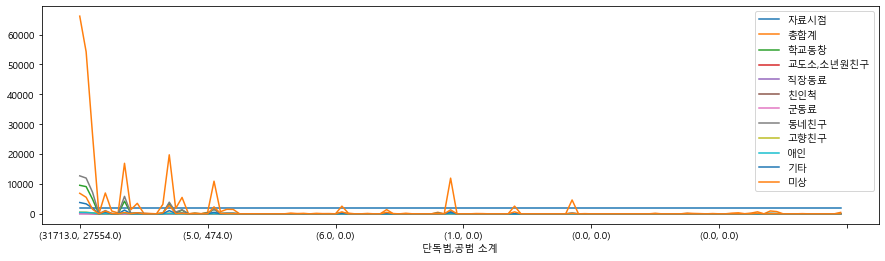

In [33]:
df_acc3.set_index(['단독범','공범 소계']).plot(figsize=(15,4))

In [35]:
df_acc4 = df_acc3.drop(['총합계','자료시점'], axis='columns')           # 총합계 열 삭제
df_acc4.head()

,대분류,중분류,소분류,단독범,공범 소계,학교동창,"교도소,소년원친구",직장동료,친인척,군동료,동네친구,고향친구,애인,기타,미상
0,계,계,계,31713.0,27554.0,9543.0,195.0,63.0,234.0,2.0,12711.0,551.0,471.0,3784.0,6875.0
1,형법범,형법범계,형법범계,22845.0,25818.0,9100.0,188.0,46.0,224.0,2.0,11963.0,535.0,430.0,3330.0,5542.0
2,형법범,재산범죄,재산범죄의 계,9988.0,14970.0,4898.0,170.0,17.0,100.0,1.0,7217.0,311.0,307.0,1949.0,1539.0
3,형법범,재산범죄,배임,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,형법범,재산범죄,사기,3737.0,2304.0,427.0,40.0,5.0,10.0,1.0,1084.0,61.0,79.0,597.0,927.0


In [36]:
df_acc5 = df_acc4.drop(index = [0])                                        # 대분류 행 삭제

<AxesSubplot:xlabel='단독범,공범 소계'>

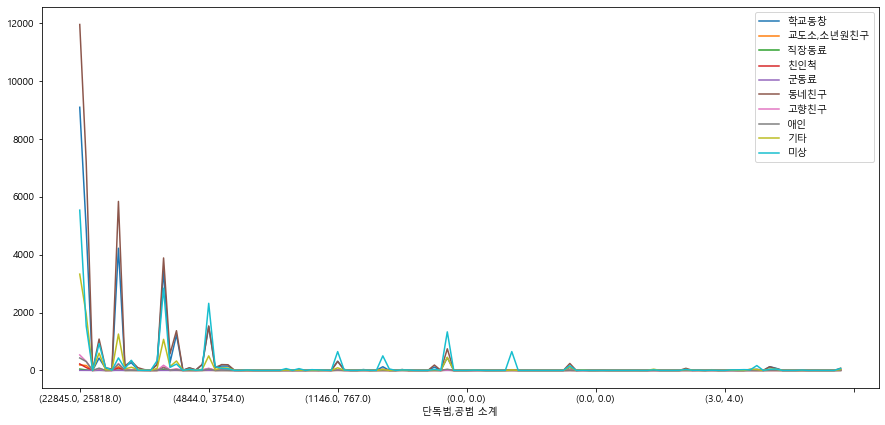

In [37]:
df_acc5.set_index(['단독범','공범 소계']).plot(figsize=(15,7))

<AxesSubplot:xlabel='소분류'>

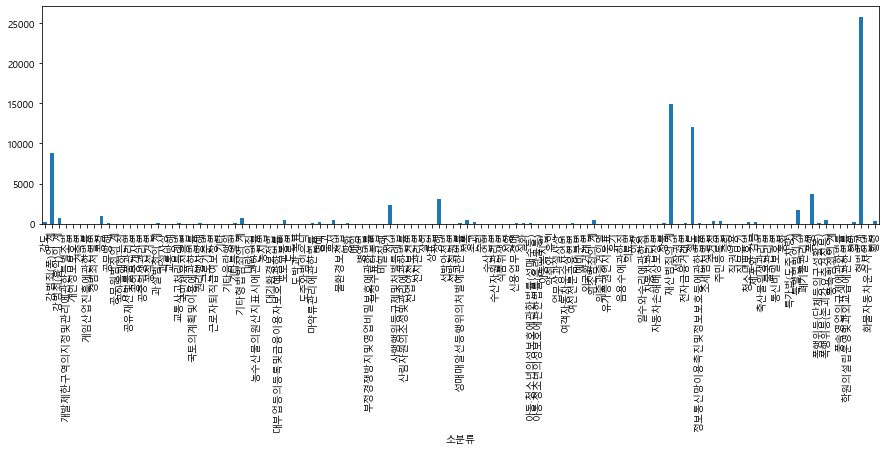

In [38]:
df_acc5.groupby('소분류')['공범 소계'].mean().plot.bar(figsize=(15,4))

## 범죄건수 3000건 이상만 나열해서 그래프 그려보고 싶다.

## 숫자별로 나열 하는 방법